John Shamshoian

Homework 1

# Q2

1. Associative rule for addition says <code>(x + y) + z == x + (y + z)</code>. Check association rule using <code>x = 0.1, y = 0.1</code> and <code>z = 1.0</code> in Julia. Explain what you find.
2. Do floating-point numbers obey the associative rule for multiplication: (x * y) * z == x * (y * z)?
3. Do floating-point numbers obey the distributive rule: a * (x + y) == a * x + a * y?
4. Is 0 * x == 0 true for all floating-point number x?
5. Is x / a == x * (1 / a) always true?

In [ ]:
# Question 2.1: Additive association rule
x = 0.1;
y = 0.1;
z = 1.0;
logical1 = (x + y) + z == x + (y + z)

# Question 2.2: Multiplicative association rule
x = realmax(Float32)
y = realmax(Float32)
z = realmin(Float32)/4
logical2 = (x * y) * z == x * (y * z)

# Question 2.3: Distributive property
x = realmax(Float32)
y = realmax(Float32)
z = .5
logical3 = z * (x + y) == z * x + z * y

# Question 2.5: Reciprocal property
a = Float32(.1)
x = Float32(5)
logical4 = a / x == a * (1 / x)

# Show that floating point numbers do not respect familiar mathematical rules:
print(logical1, '\n', logical2, '\n', logical3, '\n', logical4)

Here I provide counter examples to prove that the additive association rule, multiplicative association rule, distributive property, and the reciprocal property do not hold for floating point numbers. However, <code>0 * x = 0</code> unless x is <code>NaN</code> or infinity.

# Q3

Consider Julia function
```julia
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end
```
Use @code_llvm to find the LLVM bitcode of compiled g with Int64 input. Does the result surprise you?
Use @code_llvm to find the LLVM bitcode of compiled g with Float64 input. Does the result surprise you?
Read Julia documentation on @fastmath and repeat the last question on the function

```julia
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end
```

In [ ]:
# Clear all function definitions to avoid overwriting function warnings
workspace()

function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end

print("LLVM bitcode with Int64 input")
@code_llvm g(1) 
print("--------------------------------", '\n')
print("LLVM bitcode with Float64 input")
@code_llvm g(1.0)

# Try using fastmath with looping
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end

print("---------------------------------",'\n')
print("LLVM bitcode with Float64 input using fastmath")
@code_llvm g_fastmath(1.0)

1. It seems like Julia is doing a single addition and a single multiplication. This surprises me because Julia isn't looping even though the program looks like it should. 

2. Julia is doing 10 additions and 10 multiplications. This does not surprise me because for each iteration of the loop there is an addition and a multiplication. Julia is looping in this case.

3. Julia is doing a single addition and a single multiplication. The documentation says @fastmath re-arranges floating-point expressions for greater efficiency. After seeing that Julia can optimize code to avoid loops, this result does not surprise me.

# Q4

Create the vector ``x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)``.

1. Plot the polynomial y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x -1 at points x.
2. Plot the polynomial y = (x - 1)^7 at points x.
3. Explain what you found.

In [ ]:
using BenchmarkTools

using Plots
plotly()

x = collect(0.988:0.001:1.012);

# Create function for polynomial
poly(x::Vector{Float64}) = x.^7 - 7 * x.^6 + 21 * x.^5 - 35 * x.^4 + 35 * x.^3 - 21 * x.^2 + 7 * x - 1
plot(x, poly(x), label = "", xlabel = "x", ylabel = "f(x)")

In [ ]:
# Evaluate the polynomial at x - 1 instead of x
plot(x, (x - 1).^7, label = "", xlabel = "x", ylabel = "f(x - 1)")

The polynomial in part 1 looks jagged because the function evaluation of <code>poly()</code> loses precision with subtraction of nearly equal numbers. The polynomial in part 2 is mathematicaly equivalent to the polynomial in part 1, but avoids loss of precision with rounding errors. 

# Q5
Read in the matrix in the file <code>longley.txt</code> on the macroeconomic data from 1947 to 1962. The columns are Employment, Prices, GNP, Jobless, Military, PopSize and Year. Plot the pairwise scatter plot between these variables. What do you observe?

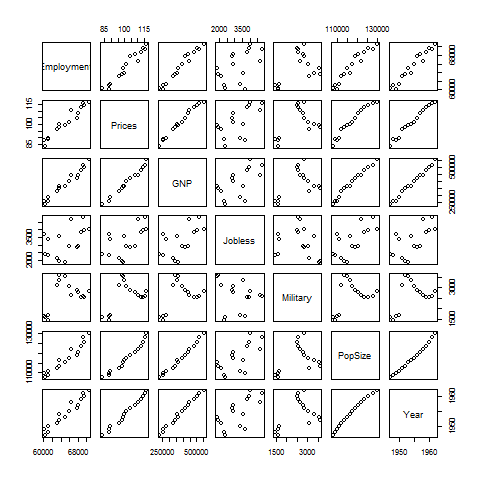

In [ ]:
using DataFrames
using Requests
using RCall
url = "http://hua-zhou.github.io/teaching/biostatm280-2017spring/hw/longley.txt"

# Read in data
df = readtable(Requests.get_streaming(url),header = false, separator = ' ');

# Rename columns to something more meaningful
rename!(df, [:x1, :x2, :x3, :x4, :x5, :x6, :x7], [:Employment, :Prices, :GNP, :Jobless, :Military, :PopSize, :Year]);

@rput df;
R"plot(df)"

# Q6

Let the  $n\times n$  matrix H have elements <code>H[i, j] = 1 / (i + j - 1)</code>.
1. Write a function h(n) that outputs  n×nn×n  matrix H. Try at least 3 ways, e.g., looping, comprehension, and vectorization. Compute and print H for n = 5.
2. Compare their efficiencies at n = 1000.
3. Try different rounding modes (use function setrounding(Float64, RoundingMode)) and report the entry inv(H)[1, 1] for n = 15.

In [ ]:
workspace()
n = 1000;

# Comprehension
function H1(n)
    H = Array(Float64);
    H = [1 / (i + j -1) for i=1:n, j=1:n];
end

# Looping
function H2(n)
    H2 = Array(Float64, n, n)
    for i = 1:n
        for j = 1:n
            H2[i, j] = 1 / (i + j - 1);
        end
    end
    H2;
end

# Vectorization
function H3(n)
    H3 = Array(Float64, n, n)
    x = collect(1.0:1:n)
    y = repmat(x, n)
    z = reshape(y, n, n)
    A = z + transpose(z) - 1
    H3 = 1 ./ A;
end

In [ ]:
# Print the comprehension version
H1(5)

In [ ]:
# Print the looping version
H2(5)

In [ ]:
# Print the vectorization version
H3(5)

In [ ]:
@benchmark H1(1000)

In [ ]:
@benchmark H2(1000)

In [ ]:
@benchmark H3(1000)

In [ ]:
H = H2(15);
v = Vector(4);
setrounding(Float64,RoundNearest) do
    v[1] = inv(H)[1, 1]
end
setrounding(Float64,RoundToZero) do
    v[2] = inv(H)[1, 1]
end
setrounding(Float64,RoundUp) do
    v[3] = inv(H)[1, 1]
end
setrounding(Float64,RoundDown) do
    v[4] = inv(H)[1, 1]
end
print(v) # inv(H)[1, 1] element with different rounding methods
eig(H)[1] # Print eigenvalues

2. It looks like creating the matrix by looping is the fastest method. Looping and comprehension are nearly equal, whereas vectorization is much slower.
3. I tried four different rounding methods. Some of the eigenvalues of the matrix are close to zero. This indicates a nearly singular matrix, so I'm not surprised that different rounding techniques yielded substantially different numbers.

In [ ]:
url = "http://hua-zhou.github.io/teaching/biostatm280-2017spring/hw/longley.txt"

# without error checking
df = readtable(Requests.get_streaming(url), header = false, separator = ' ')

In [ ]:
using DataFrames
using Requests
url = "http://hua-zhou.github.io/teaching/biostatm280-2017spring/hw/longley.txt"

# without error checking
df = readtable(Requests.get_streaming(url), header = false, separator = ' ')